In [83]:
pitchers = read.csv('data/nc_pitchers.csv', stringsAsFactors=FALSE)

In [84]:
pitchers_org = pitchers

In [85]:
str(pitchers)

'data.frame':	40 obs. of  40 variables:
 $ X2루타           : num  6 7 12 6 9 8 0 27 12 10 ...
 $ X3루타           : num  0 0 0 0 2 2 0 2 3 1 ...
 $ 경기             : num  22 30 15 33 20 48 3 29 30 56 ...
 $ 경력             : chr  "진북초-덕수중-유신고-두산-상무-두산" "서울이수초-서울경원중-장충고-히어로즈-넥센-상무-넥센" "천안남산초-덕수중-울산공고" "광주수창초-무등중-진흥고-넥센-상무-넥센" ...
 $ 고의4구          : num  1 0 0 0 0 1 0 0 0 0 ...
 $ 등번호           : int  21 68 59 24 58 55 67 12 40 56 ...
 $ 보크             : num  0 0 0 0 2 0 0 2 0 0 ...
 $ 볼넷             : num  11 11 18 25 14 10 8 63 57 15 ...
 $ 블론세이브       : num  1 0 0 1 0 1 0 0 0 3 ...
 $ 삼진             : num  17 15 102 37 55 56 7 125 167 44 ...
 $ 생년월일         : chr  "1992년 12월 18일" "1990년 07월 10일" "1997년 02월 17일" "1991년 10월 02일" ...
 $ 선수명           : chr  "강동연" "강윤구" "구창모" "김건태" ...
 $ 세이브           : num  0 0 0 0 0 0 0 0 0 10 ...
 $ 승률             : num  0.333 0.5 1 0.5 0.5 1 0 0.55 0.792 0 ...
 $ 승리             : num  1 1 9 1 2 3 0 11 19 0 ...
 $ 신장.체중        : chr  "195cm/94kg" "183cm/89

In [86]:

grep("달러", "50000달러")
grep("만원", "50000달러")
grep("달러", "5000만원")
grep("만원", "5000만원")

[1] 1

integer(0)

integer(0)

[1] 1

In [87]:
parseCurrency = function(item) {
    if (length(grep('달러', item))) {
        item = as.numeric(substr(item, 1, nchar(item)-2)) * 1130
    } else if (length(grep('만원', item))) {
        item = as.numeric(substr(item, 1, nchar(item)-2)) * 10000
    } else {
        item = as.numeric(item)
    }
    return(item)
}

In [88]:

pitchers$연봉 = sapply(pitchers$연봉, parseCurrency)
str(pitchers$연봉)

 num [1:40] 3.40e+07 1.55e+08 1.80e+08 9.00e+07 6.30e+07 1.60e+08 2.70e+07 9.04e+08 1.13e+09 1.15e+08 ...


In [89]:
parseAge = function(item) {
    return(2020 - as.numeric(substr(item, 1, 4)))
}
pitchers$나이 = sapply(pitchers$생년월일, parseAge)

In [90]:
table(pitchers$나이)


20 21 22 23 24 25 28 29 30 31 32 33 35 
 4  2  2  3  2  2  4  2 10  1  2  2  4 

In [91]:
weight = strsplit("189cm/75kg", "/")[[1]][[1]]
height = strsplit("189cm/75kg", "/")[[1]][[2]]

as.numeric(substr(weight, 1, nchar(weight)-2))
as.numeric(substr(height, 1, nchar(height)-2))

[1] 189

[1] 75

In [92]:
parseHeight = function(item) {
    height = strsplit(item, "/")[[1]][[1]]
    return(as.numeric(substr(height, 1, nchar(height)-2)))
}
parseWeight = function(item) {
    weight = strsplit(item, "/")[[1]][[2]]
    return(as.numeric(substr(weight, 1, nchar(weight)-2)))
}

In [93]:
pitchers$신장 = sapply(pitchers$신장.체중, parseHeight)
pitchers$체중 = sapply(pitchers$신장.체중, parseWeight)
str(pitchers$신장)
str(pitchers$체중)

 num [1:40] 195 183 183 185 188 186 183 198 188 186 ...
 num [1:40] 94 89 85 85 86 92 90 97 91 85 ...


In [94]:

drops = c('등번호')
pitchers = pitchers[, !(names(pitchers) %in% drops)]

non-numeric 데이터 제거, normalization, nan 제거

In [95]:
normalize = function(x) {
    (x - min(x)) / (max(x) - min(x))
}

In [96]:
pitchers[, sapply(pitchers, is.numeric)] = lapply(pitchers[, sapply(pitchers, is.numeric)], normalize)
pitchers = pitchers[, sapply(pitchers, is.numeric)]
pitchers = pitchers[!sapply(pitchers, function(x) { all(is.nan(x)) })]
str(pitchers)

'data.frame':	40 obs. of  31 variables:
 $ X2루타           : num  0.222 0.259 0.444 0.222 0.333 ...
 $ X3루타           : num  0 0 0 0 0.667 ...
 $ 경기             : num  0.288 0.409 0.182 0.455 0.258 ...
 $ 고의4구          : num  0.333 0 0 0 0 ...
 $ 보크             : num  0 0 0 0 1 0 0 1 0 0 ...
 $ 볼넷             : num  0.0877 0.0877 0.2105 0.3333 0.1404 ...
 $ 블론세이브       : num  0.167 0 0 0.167 0 ...
 $ 삼진             : num  0.0625 0.05 0.5938 0.1875 0.3 ...
 $ 세이브           : num  0 0 0 0 0 ...
 $ 승률             : num  0.333 0.5 1 0.5 0.5 1 0 0.55 0.792 0 ...
 $ 승리             : num  0.0526 0.0526 0.4737 0.0526 0.1053 ...
 $ 실점             : num  0.157 0.145 0.193 0.181 0.518 ...
 $ 연봉             : num  0.00635 0.11605 0.13871 0.05712 0.03264 ...
 $ 이닝             : num  0.0792 0.0618 0.4807 0.1429 0.332 ...
 $ 이닝당.출루허용률: num  0.583 0.902 0 0.553 0.47 ...
 $ 자책점           : num  0.165 0.165 0.19 0.203 0.481 ...
 $ 퀄리티스타트     : num  0 0 0.6 0 0.2 0 0 0.65 1 0 ...
 $ 타자수           : num  0

## 상관관계 분석

In [97]:
library(reshape2)

In [98]:

CM = cor(pitchers)
CM[lower.tri(CM, diag = TRUE)] = NA
subset(melt(CM, na.rm = TRUE), value >= .80)
subset(melt(CM, na.rm = TRUE), value <= -.80)

,Var1,Var2,value
318,삼진,승리,0.9341190
342,X2루타,실점,0.8611970
347,볼넷,실점,0.8346771
380,삼진,연봉,0.8535757
383,승리,연봉,0.8281693
409,볼넷,이닝,0.8413149
411,삼진,이닝,0.9639438
414,승리,이닝,0.9044872
415,실점,이닝,0.8573925
416,연봉,이닝,0.8830119


Var1,Var2,value


## 다중회귀분석

In [99]:
salary_model = lm(연봉 ~ ., data=pitchers)

In [100]:
summary(salary_model)


Call:
lm(formula = 연봉 ~ ., data = pitchers)

Residuals:
       Min         1Q     Median         3Q        Max 
-5.113e-15 -6.777e-16  0.000e+00  6.777e-16  5.113e-15 

Coefficients: (10 not defined because of singularities)
                    Estimate Std. Error    t value Pr(>|t|)    
(Intercept)        2.234e+00  4.538e-14  4.923e+13   <2e-16 ***
X2루타             2.183e+00  3.206e-14  6.810e+13   <2e-16 ***
X3루타            -6.852e-01  1.887e-14 -3.630e+13   <2e-16 ***
경기               6.664e-01  7.288e-15  9.144e+13   <2e-16 ***
고의4구            3.718e+00  5.770e-14  6.443e+13   <2e-16 ***
보크              -6.906e-01  6.544e-15 -1.055e+14   <2e-16 ***
볼넷              -1.335e+00  1.640e-14 -8.141e+13   <2e-16 ***
블론세이브        -5.110e+00  8.360e-14 -6.112e+13   <2e-16 ***
삼진               6.648e+00  1.308e-13  5.082e+13   <2e-16 ***
세이브             5.067e+00  7.558e-14  6.704e+13   <2e-16 ***
승률              -3.982e+00  7.296e-14 -5.458e+13   <2e-16 ***
승리              -7.021e-01  1.6

## PCA 분석

In [101]:
pitchers_pca = prcomp(pitchers[,!(names(pitchers) == c('연봉'))], center=TRUE, scale=TRUE)
summary(pitchers_pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     3.6052 2.0878 1.7710 1.44304 1.24700 1.17274 1.07633
Proportion of Variance 0.4332 0.1453 0.1046 0.06941 0.05183 0.04584 0.03862
Cumulative Proportion  0.4332 0.5785 0.6831 0.75250 0.80433 0.85018 0.88879
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     0.90752 0.84022 0.75488 0.59138 0.52099 0.46703 0.3836
Proportion of Variance 0.02745 0.02353 0.01899 0.01166 0.00905 0.00727 0.0049
Cumulative Proportion  0.91625 0.93978 0.95877 0.97043 0.97948 0.98675 0.9917
                         PC15   PC16    PC17    PC18    PC19    PC20      PC21
Standard deviation     0.3195 0.2681 0.23471 0.10801 0.08005 0.05716 2.807e-16
Proportion of Variance 0.0034 0.0024 0.00184 0.00039 0.00021 0.00011 0.000e+00
Cumulative Proportion  0.9951 0.9974 0.99929 0.99968 0.99989 1.00000 1.000e+00
                            PC22      PC23

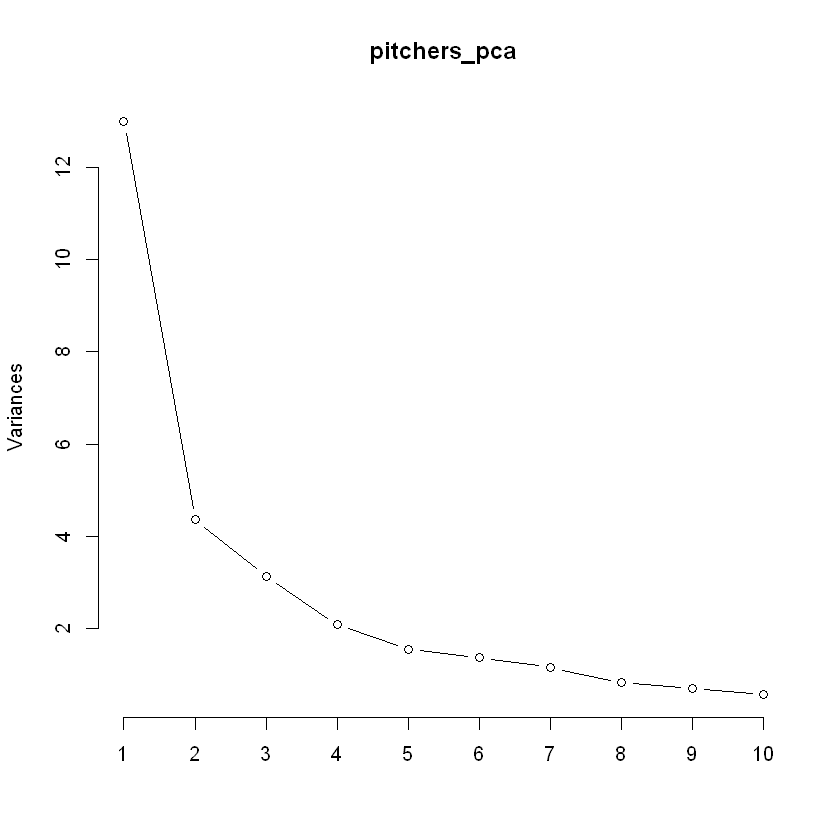

In [102]:
plot(pitchers_pca, type = "l")

각 Principal Component에 따른 데이터의 분산을 그려보았다(분산이 클수록 해당 주성분이 데이터의 분포를 많이 설명한다는 뜻이다).

In [103]:
library(devtools)

In [29]:

install.packages('devtools', repos='http://cran.nexr.com/')

also installing the dependencies 'memoise', 'git2r'

Warning message:
"unable to access index for repository http://cran.nexr.com/bin/windows/contrib/3.6:
  URL 'http://cran.nexr.com/bin/windows/contrib/3.6/PACKAGES'를 열 수 없습니다"Packages which are only available in source form, and may need
  compilation of C/C++/Fortran: 'git2r' 'devtools'


  These will not be installed


installing the source package 'memoise'



In [31]:
install.packages("devtools")

also installing the dependencies 'credentials', 'openssl', 'zip', 'gitcreds', 'ini', 'diffobj', 'rematch2', 'fs', 'gert', 'gh', 'lifecycle', 'rappdirs', 'rprojroot', 'processx', 'rex', 'crosstalk', 'xopen', 'brew', 'commonmark', 'purrr', 'brio', 'praise', 'ps', 'waldo', 'usethis', 'callr', 'cli', 'covr', 'desc', 'DT', 'ellipsis', 'httr', 'jsonlite', 'pkgbuild', 'pkgload', 'rcmdcheck', 'remotes', 'rlang', 'roxygen2', 'rstudioapi', 'rversions', 'sessioninfo', 'testthat', 'withr'



package 'credentials' successfully unpacked and MD5 sums checked
package 'openssl' successfully unpacked and MD5 sums checked
package 'zip' successfully unpacked and MD5 sums checked
package 'gitcreds' successfully unpacked and MD5 sums checked
package 'ini' successfully unpacked and MD5 sums checked
package 'diffobj' successfully unpacked and MD5 sums checked
package 'rematch2' successfully unpacked and MD5 sums checked
package 'fs' successfully unpacked and MD5 sums checked
package 'gert' successfully unpacked and MD5 sums checked
package 'gh' successfully unpacked and MD5 sums checked
package 'lifecycle' successfully unpacked and MD5 sums checked
package 'rappdirs' successfully unpacked and MD5 sums checked
package 'rprojroot' successfully unpacked and MD5 sums checked
package 'processx' successfully unpacked and MD5 sums checked
package 'rex' successfully unpacked and MD5 sums checked
package 'crosstalk' successfully unpacked and MD5 sums checked
package 'xopen' successfully unpack

Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\user\anaconda3\envs\kbo\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll를 C:\Users\user\anaconda3\envs\kbo\Lib\R\library\jsonlite\libs\x64\jsonlite.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'jsonlite'"

package 'pkgbuild' successfully unpacked and MD5 sums checked
package 'pkgload' successfully unpacked and MD5 sums checked
package 'rcmdcheck' successfully unpacked and MD5 sums checked
package 'remotes' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'roxygen2' successfully unpacked and MD5 sums checked
package 'rstudioapi' successfully unpacked and MD5 sums checked
package 'rversions' successfully unpacked and MD5 sums checked
package 'sessioninfo' successfully unpacked and MD5 sums checked
package 'testthat' successfully unpacked and MD5 sums checked
package 'withr' successfully unpacked and MD5 sums checked
package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\Rtmp6h0QAq\downloaded_packages


In [104]:
library(devtools)

In [43]:
install_github("vqv/ggbiplot", force = TRUE)


Please download and install Rtools 3.5 from https://cran.r-project.org/bin/windows/Rtools/.


colorspace  (1.4-1  -> 2.0-0 ) [CRAN]
glue        (1.3.1  -> 1.4.2 ) [CRAN]
digest      (0.6.18 -> 0.6.27) [CRAN]
vctrs       (NA     -> 0.3.6 ) [CRAN]
pkgconfig   (2.0.2  -> 2.0.3 ) [CRAN]
pillar      (1.3.1  -> 1.4.7 ) [CRAN]
magrittr    (1.5    -> 2.0.1 ) [CRAN]
fansi       (0.4.0  -> 0.4.1 ) [CRAN]
R6          (2.4.0  -> 2.5.0 ) [CRAN]
labeling    (0.3    -> 0.4.2 ) [CRAN]
farver      (NA     -> 2.0.3 ) [CRAN]
prettyunits (1.0.2  -> 1.1.1 ) [CRAN]
tibble      (2.1.1  -> 3.0.4 ) [CRAN]
jsonlite    (1.6    -> 1.7.2 ) [CRAN]
evaluate    (0.13   -> 0.14  ) [CRAN]
Rcpp        (1.0.1  -> 1.0.5 ) [CRAN]
scales      (1.0.0  -> 1.1.1 ) [CRAN]
isoband     (NA     -> 0.2.3 ) [CRAN]
plyr        (1.8.4  -> 1.8.6 ) [CRAN]
ggplot2     (3.1.1  -> 3.3.2 ) [CRAN]


Installing 20 packages: colorspace, glue, digest, vctrs, pkgconfig, pillar, magrittr, fansi, R6, labeling, farver, prettyunits, tibble, jsonlite, evaluate, Rcpp, scales, isoband, plyr, ggplot2


package 'colorspace' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked


ERROR: Error: Failed to install 'ggbiplot' from GitHub:
  (converted from warning) cannot remove prior installation of package 'glue'


In [105]:
pitchers_pca$rotation[, 1:2]

,PC1,PC2
X2루타,0.22321793,-0.09759069
X3루타,0.17882513,0.08305680
경기,-0.02249544,0.32065515
고의4구,-0.04607880,0.21088269
보크,0.11787449,-0.11883685
볼넷,0.24488241,-0.01918965
블론세이브,-0.03241255,0.19423742
삼진,0.25813946,0.10436252
세이브,-0.01557245,0.12135314
승률,0.08827816,0.27116619


## PCA + 다중회귀분석

In [106]:

pitchers2d = data.frame(predict(pitchers_pca, pitchers)[, 1:2])
pitchers2d$salary = pitchers$연봉
str(pitchers2d)


'data.frame':	40 obs. of  3 variables:
 $ PC1   : num  -2.75 -3.26 1.17 -2 1.33 ...
 $ PC2   : num  -1.011 -2 2.41 0.398 -2.187 ...
 $ salary: num  0.00635 0.11605 0.13871 0.05712 0.03264 ...


In [107]:
salary2d = lm(salary ~ ., data=pitchers2d)
summary(salary2d)


Call:
lm(formula = salary ~ ., data = pitchers2d)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33131 -0.05620  0.01433  0.06824  0.24418 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.160993   0.020802   7.739 3.01e-09 ***
PC1         0.062229   0.005844  10.649 8.04e-13 ***
PC2         0.009041   0.010091   0.896    0.376    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1316 on 37 degrees of freedom
Multiple R-squared:  0.7553,	Adjusted R-squared:  0.7421 
F-statistic:  57.1 on 2 and 37 DF,  p-value: 4.897e-12


In [108]:

salary_factors = salary2d$coefficients['PC1'][[1]] * pitchers_pca$rotation[,1]
salary_factors = salary_factors + salary2d$coefficients['PC2'][[1]] * pitchers_pca$rotation[,2]

In [109]:
sort(salary_factors, decreasing=TRUE)

이닝            투구수            타자수              삼진 
     0.0173221465      0.0172560326      0.0172463286      0.0170072242 
           피안타              승리      퀄리티스타트              볼넷 
     0.0164074547      0.0160065676      0.0153177510      0.0150652461 
             실점            자책점              폭투          희생번트 
     0.0144756103      0.0142251349      0.0141685206      0.0139664879 
           X2루타            X3루타              홈런              패배 
     0.0130082848      0.0118789696      0.0113442623      0.0112161751 
             승률              신장              보크              체중 
     0.0079449965      0.0074816148      0.0062608090      0.0044919339 
             나이        희생플라이              경기            세이브 
     0.0037109986      0.0035647536      0.0014991091      0.0001280722 
       블론세이브           고의4구              홀드          피안타율 
    -0.0002609359     -0.0009608838     -0.0037181444     -0.0055596216 
이닝당.출루허용률        평균자책점 
    -0.0085194787     -0.0091972118